<a href="https://colab.research.google.com/github/Aaronphilip2003/Jovian_Final_Project/blob/main/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# airbnb

Use the "Run" button to execute the code.

In [1]:
!pip install opendatasets pandas numpy --upgrade --quiet

In [2]:
!pip install plotly matplotlib seaborn --upgrade --quiet

### **Import all the relevant libraries**

In [3]:
import pandas as pd
import numpy as np
import opendatasets as od
import os

In [4]:
od.download("https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings")

Skipping, found downloaded files in "./airbnb-recruiting-new-user-bookings" (use force=True to force download)


In [5]:
data_dir='./airbnb-recruiting-new-user-bookings'

In [6]:
os.listdir(data_dir)

['age_gender_bkts.csv.zip',
 'sample_submission_NDF.csv.zip',
 'sessions.csv.zip',
 'train_users_2.csv.zip',
 'countries.csv.zip',
 'test_users.csv.zip']

### **Read the CSV used for training the data**

In [7]:
train_df=pd.read_csv(data_dir+'/train_users_2.csv.zip')

In [8]:
train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


### **Get information about the dataset**

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [10]:
train_df.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

## **DATA CLEANING**

In [11]:
train_df['country_destination'].unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

**NDF stands for no data found so let us remove these rows from our dataset**

In [12]:
ndf_index=train_df[train_df['country_destination']=='NDF'].index
print(len(ndf_index))

124543


**From the above information, it is clear that we will need to drop around 124000 rows from our dataset**

In [13]:
train_df.drop(labels=ndf_index,inplace=True)

In [14]:
train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,2014-06-30,20140630230136,2014-06-30,-unknown-,55.0,basic,0,en,sem-brand,google,omg,Web,Android Tablet,IE,FR
213439,msucfwmlzc,2014-06-30,20140630234729,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US


**After dropping those rows, we still have around 88000 rows left to train our model on**

In [15]:
train_df.country_destination.unique()

array(['US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL', 'DE',
       'AU'], dtype=object)

**Now we'll clean the gender column and remove all unknown columns**

In [16]:
train_df['gender'].unique()

array(['FEMALE', '-unknown-', 'MALE', 'OTHER'], dtype=object)

In [17]:
unknown_index=train_df[train_df['gender']=='-unknown-'].index
unknown_index

Index([     4,      5,      9,     12,     17,     20,     22,     28,     29,
           30,
       ...
       213371, 213373, 213376, 213398, 213401, 213404, 213405, 213406, 213410,
       213415],
      dtype='int64', length=29018)

**We need to remove around 29000 rows of data**

In [18]:
train_df.drop(unknown_index,inplace=True)

In [19]:
train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213412,a1rvlsdijt,2014-06-30,20140630225157,2015-01-23,FEMALE,50.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,US
213439,msucfwmlzc,2014-06-30,20140630234729,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US


**After cleaning we still have around 60000 rows of data to train our model on**

In [20]:
train_df.describe()

,timestamp_first_active,age,signup_flow
count,5.989000e+04,56494.000000,59890.000000
mean,2.012972e+13,48.553758,2.348472
std,9.441432e+09,153.632390,6.285540
min,2.009061e+13,2.000000,0.000000
25%,2.012093e+13,28.000000,0.000000
50%,2.013072e+13,33.000000,0.000000
75%,2.014021e+13,41.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [21]:
print(max(train_df['age']))

2014.0


**There is clearly something wrong with the dataset so we'll take only the relevant ages (5-100)**

In [22]:
age_index_100=train_df[train_df['age']>100].index
age_index_5=train_df[train_df['age']<5].index
train_df.drop(labels=age_index_100,inplace=True)
train_df.drop(labels=age_index_5,inplace=True)

In [23]:
train_df.describe()

,timestamp_first_active,age,signup_flow
count,5.906900e+04,55673.000000,59069.000000
mean,2.012972e+13,36.015573,2.355838
std,9.444645e+09,11.099460,6.294320
min,2.009061e+13,5.000000,0.000000
25%,2.012093e+13,28.000000,0.000000
50%,2.013072e+13,33.000000,0.000000
75%,2.014021e+13,41.000000,0.000000
max,2.014063e+13,100.000000,25.000000


**Now we have relevant ages 5-100**

# **Data Visualisation**

In [24]:
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## **Countries from where the most business is coming from**

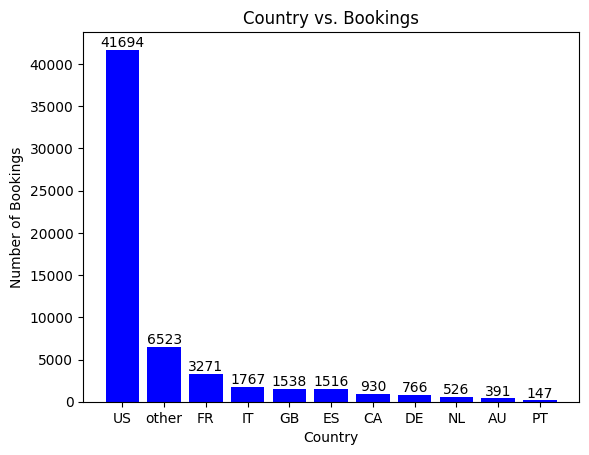

In [33]:
country = train_df.groupby('country_destination').count().sort_values(by='id', ascending=False)

plt.bar(country.index, country['id'], color='b')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Country vs. Bookings')

# Add annotations on top of each bar
for i, count in enumerate(country['id']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

## **Gender vs booking**

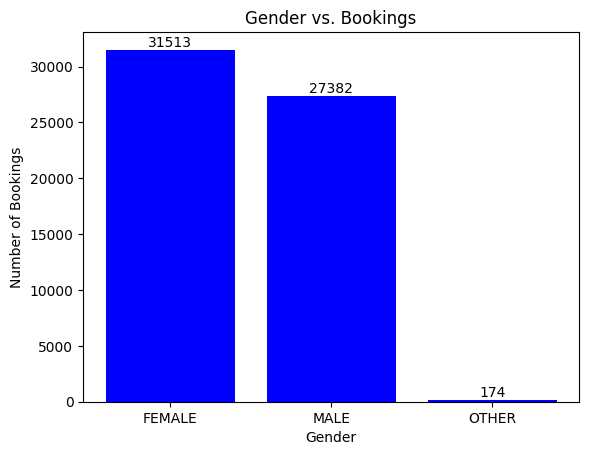

In [44]:
country = train_df.groupby('gender').count().sort_values(by='id', ascending=False)

plt.bar(country.index, country['id'], color='b')
plt.xlabel('Gender')
plt.ylabel('Number of Bookings')
plt.title('Gender vs. Bookings')

# Add annotations on top of each bar
for i, count in enumerate(country['id']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

## **Browsers used**

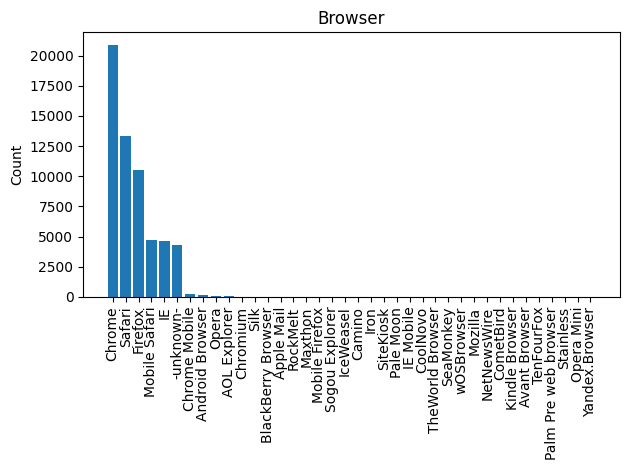

In [50]:
browser_count = train_df['first_browser'].value_counts()
fig, ax = plt.subplots()
ax.bar(browser_count.index, browser_count.values)
plt.xticks(rotation=90)

ax.set_ylabel('Count')
ax.set_title('Browser')

fig.tight_layout()
plt.show()